# {How Crime Incidents in Cincinnati Vary Over Time and Across Different Neighborhoods?}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 How do crime incidents in Cincinnati vary over time and across different neighborhoods? The problem I am trying to address is the impact of police response times and on crime rates in Cincinnati. One reason why many parents may worry about putting their kids for University of Cincinnati as the surrounding areas are high in crime rates and can be very dangerous. By evaluating these datasets and API, it can help local law enforcement and community stakeholders analyze the effectiveness of police operations and how resources are being allocated. With the Cincinnati Police Data Initiative dataset, we can identify trends that reveal how different types of crimes have a relationship with varied response times on different neighborhoods and time periods. For example, if longer response times are consistently involved with increased crime rates, this can highlight the areas that need additional officers or resources etc. to improve community safety. This project is meant to uncover patterns that can guide our law enforcement to make more efficient policing strategies and contribute to the overall safety and well-being of Cincinnati's residents, including UC students!!!


## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 With this project, I am seeking to answer the specific question: How do police response times correlate with different types of crime rates in Cincinnati. What suggestions does this relationship have for resource allocation and community safety? 

By exploring this question, I want to find out if longer response times lead to higher crime rates, identify which neighborhoods/areas are most affected, and assess the effectiveness of our current policing strategies. Also I want to understand if certain types of crimes have faster response rates or vice verse, and thus this could educate targeted civilians and cause some policy adjustments. Overall this analysis will help guide decisions on how to optimize police resources and enhance public safety and build more community trust in our law enforcement.

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 My hypothesized answer is that longer police response times are related with higher crime rates in Cincinnati. I expect to discover that areas with longer response times experience a greater number of violent crimes, like assault and robbery, compared to property crimes. And these may be less influenced by immediate and more quick police presence. Also, I believe that certain neighborhoods, particularly those with fewer police resources, will show more inequalities in crime rates related to response times. This analysis may expose that quick responses are imperative in preventing crimes and/or addressing ongoing incidents effectively. In conclusion, the findings could indicate a need for reallocating police resources to enhance response procedures in areas with high-crime.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 5 data sources in total

Datasets (4): 
https://data.cincinnati-oh.gov/safety/PDI-Police-Data-Initiative-Police-Calls-for-Servic/gexm-h6bt/about_data
https://data.cincinnati-oh.gov/safety/PDI-Police-Data-Initiative-Crime-Incidents/k59e-2pvf/about_data
https://data.cincinnati-oh.gov/safety/CPD-Reported-Shootings/sfea-4ksu/about_data
https://data.cincinnati-oh.gov/Safety/PDI-Police-Data-Initiative-Use-of-Force/8us8-wi2w/about_data

API (1):
https://dev.socrata.com/foundry/data.cincinnati-oh.gov/k59e-2pvf

I am going to relate these data sources by connecting the Police Calls for Service and Crime Incidents dataset by utilizing the shared timestamps and locations. This will allow us to examine how response times for different types of calls, like violent or property crimes, relate to the frequency and outcomes of incidents in the same areas.

By linking crime types from the Crime Incidents dataset with their corresponding calls for service, we can analyze how response times differ depending on the severity or nature of the crime. This will provide valuable insights into the relationship between response times and crime rates.

Also via using the geographical information from both datasets, we can conduct a neighborhood-level analysis. This will help us explore how response times and crime rates vary across different areas and assess whether these differences contribute to higher crime rates in specific neighborhoods or influence the effectiveness of police response strategies.


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 My approach to answering my project question is a systematic one. I will being by starting with data preparation and analysis. That means I will clean both the Police Calls for Service and Crime Incidents datasets, to make sure fields like timestamps and location data etc are all consistent. Then move onto handling any missing or irrelevant data so it will mess up later on in the project. Next, I will merge the two datasets by matching incidents based on time and location. This will allow me to link calls for service with the corresponding crime events. When I am calculating response times for each call it will help determine the time difference between when the call was made and when the officers actually arrived on the scene. Moving on, we will analyze how response times vary for the different types of crime like violent and property crimes. Then we can use those findings to investigate patterns in how severe they were. It can also help us assess whether delays in certain areas are contributing to crime patterns or affecting police effectiveness. Then finally I will use statistical methods to explore the relationship between response times and crime outcomes more closer, like through regression modeling for instance.

In [6]:
import pandas as pd
import requests

#accessing API for Crime Incidents data
api_url = 'https://data.cincinnati-oh.gov/resource/k59e-2pvf.json'
headers = {'Accept': 'application/json'}  #requesting JSON response
response = requests.get(api_url, headers=headers)

#check if the API call was successful
if response.status_code == 200:
    api_data = pd.DataFrame(response.json())  #load the data into a df
    print(f"API Data Loaded: {len(api_data)} records.")  #check number of records loaded
else:
    print(f"API request failed with status code: {response.status_code}")


API Data Loaded: 1000 records.


In [12]:
import pandas as pd

#load the Police Calls for Service dataset
calls_for_service_url = 'https://data.cincinnati-oh.gov/api/views/gexm-h6bt/rows.csv?accessType=DOWNLOAD'

#display the first five rows of the dataset
print("Police Calls for Service Data (First 5 Rows):")
print(calls_for_service_data.head())


Police Calls for Service Data (First 5 Rows):
               ADDRESS_X AGENCY    CREATE_TIME_INCIDENT DISPOSITION_TEXT  \
0        12XX PURCELL AV    CPD  11/15/2021 11:03:58 PM         INV: INV   
1      46XX RAPID RUN RD    CPD  11/15/2021 11:03:34 PM      ADV:ADVISED   
2  3XX EZZARD CHARLES DR    CPD  11/15/2021 11:00:58 PM  TRAN: TRANSPORT   
3       XX E MCMICKEN AV    CPD  11/15/2021 11:00:01 PM         INV: INV   
4      19XX BALTIMORE AV    CPD  11/15/2021 10:59:48 PM       REPO: REPO   

      EVENT_NUMBER INCIDENT_TYPE_ID                INCIDENT_TYPE_DESC  \
0  CPD211115001474             MHRT        MENTALLY IMPAIRED NON VIOL   
1  CPD211115001473              ADV                  ADVISED INCIDENT   
2  CPD211115001472             PRIS                  PRISONER PICK UP   
3  CPD211115001470           DIRPAT         DIRECTED PATROL - VEHICLE   
4  CPD211115001469             REPO  TOWED VEH - FOR RECORDS USE ONLY   

   PRIORITY PRIORITY_COLOR ARRIVAL_TIME_PRIMARY_UNIT    CL

In [20]:
import pandas as pd

#load the Crime Incidents dataset
crime_incidents_url = 'https://data.cincinnati-oh.gov/api/views/k59e-2pvf/rows.csv?accessType=DOWNLOAD'

#display the first five rows of the dataset
print("Crime Incidents Data (First 5 Rows):")
print(crime_incidents_data.head())

Crime Incidents Data (First 5 Rows):
                             INSTANCEID INCIDENT_NO           DATE_REPORTED  \
0  11F33AFB-8553-4AC5-8BE2-7EDBB40746A3   249014580  06/03/2024 03:56:00 AM   
1  977A4054-BBF4-4FE7-A49A-5863F3101FD2   249014578  06/03/2024 03:30:00 AM   
2  EC8438D0-B99E-4A8C-B6ED-8A9FF60B3069   249014579  06/03/2024 03:15:00 AM   
3  EC8438D0-B99E-4A8C-B6ED-8A9FF60B3069   249014579  06/03/2024 03:15:00 AM   
4  7E176D2F-B81F-4A39-8AFF-761840BA15A3   249014573  06/03/2024 02:13:00 AM   

                DATE_FROM                 DATE_TO  \
0  06/03/2024 03:45:00 AM  06/03/2024 03:50:00 AM   
1  06/03/2024 03:00:00 AM  06/03/2024 03:05:00 AM   
2  06/03/2024 03:10:00 AM  06/03/2024 03:14:00 AM   
3  06/03/2024 03:10:00 AM  06/03/2024 03:14:00 AM   
4  06/03/2024 02:10:00 AM  06/03/2024 02:13:00 AM   

                           CLSD     UCR               DST BEAT  \
0                     J--CLOSED   303.0  CENTRAL BUSINESS    1   
1                  K--UNFOUNDED   401

## Checkpoint 2 

## Exploratory Data Analysis (EDA) & Visualization

You should use several visualizations to help answer the questions below.

- What insights and interesting information are you able to extract at this stage?
- What are the distributions of my variables?
- Are there any correlations between my variables?
- What issues can you see in your data at this point?
- Are there any outliers or anomalies? Are they relevant to your analysis? Or should they be removed?
- Are there any missing values? How are you going to deal with them?
- Are there any duplicate values? How are you going to deal with them?
- Are there any data types that need to be changed?

Visualizes trends over time, potentially identifying patterns such as seasonal spikes in crime

API Data Loaded: 1000 records.
Columns in the DataFrame:
Index(['instanceid', 'incident_no', 'date_reported', 'date_from', 'date_to',
       'clsd', 'ucr', 'dst', 'beat', 'offense', 'location', 'dayofweek',
       'rpt_area', 'cpd_neighborhood', 'weapons', 'date_of_clearance',
       'hour_from', 'hour_to', 'address_x', 'longitude_x', 'latitude_x',
       'victim_age', 'victim_gender', 'suspect_age', 'suspect_gender',
       'ucr_group', 'zip', 'community_council_neighborhood',
       'sna_neighborhood', 'theft_code', 'victim_ethnicity',
       'totalnumbervictims', 'hate_bias', 'suspect_ethnicity'],
      dtype='object')
Sample Data:
                             instanceid incident_no            date_reported  \
0  11F33AFB-8553-4AC5-8BE2-7EDBB40746A3   249014580  2024-06-03T03:56:00.000   
1  977A4054-BBF4-4FE7-A49A-5863F3101FD2   249014578  2024-06-03T03:30:00.000   
2  EC8438D0-B99E-4A8C-B6ED-8A9FF60B3069   249014579  2024-06-03T03:15:00.000   
3  EC8438D0-B99E-4A8C-B6ED-8A9FF60B30

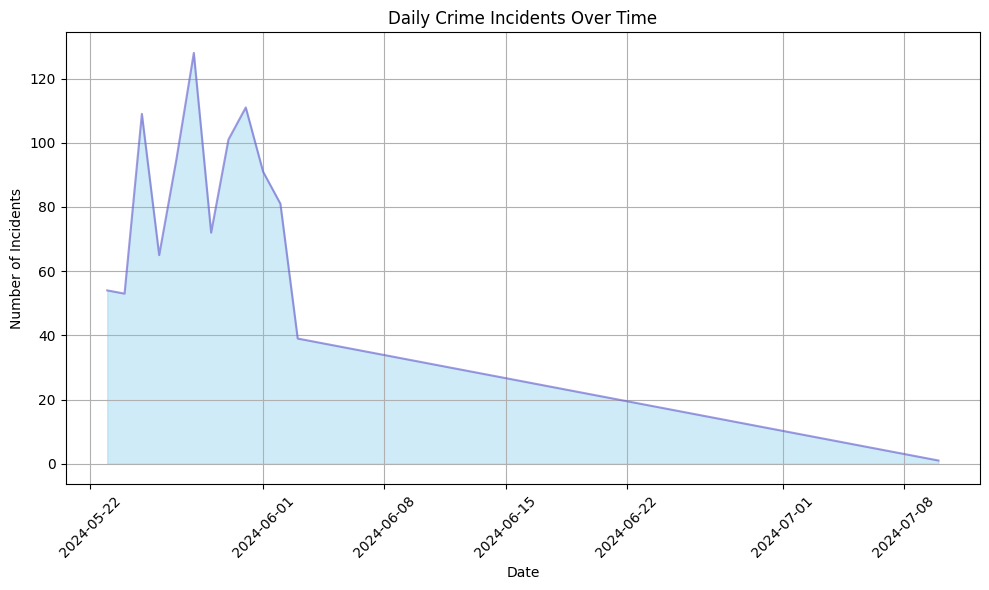

In [5]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Accessing API for Crime Incidents data
api_url = 'https://data.cincinnati-oh.gov/resource/k59e-2pvf.json'
headers = {'Accept': 'application/json'}  # Requesting JSON response
response = requests.get(api_url, headers=headers)

# Check if the API call was successful
if response.status_code == 200:
    api_data = pd.DataFrame(response.json())  # Load the data into a DataFrame
    print(f"API Data Loaded: {len(api_data)} records.")  # Check number of records loaded
    
    # Inspect the DataFrame columns
    print("Columns in the DataFrame:")
    print(api_data.columns)
    
    # Display the first few records of the DataFrame
    print("Sample Data:")
    print(api_data.head())
else:
    print(f"API request failed with status code: {response.status_code}")

# Ensure the 'date_reported' column is in datetime format if it exists
if 'date_reported' in api_data.columns:
    api_data['date_reported'] = pd.to_datetime(api_data['date_reported'])
    
    # Grouping the data by date
    daily_crimes = api_data.groupby(api_data['date_reported'].dt.date).size()

    # Creating the area chart
    plt.figure(figsize=(10, 6))
    plt.fill_between(daily_crimes.index, daily_crimes.values, color="skyblue", alpha=0.4)
    plt.plot(daily_crimes.index, daily_crimes.values, color="Slateblue", alpha=0.6)
    plt.title('Daily Crime Incidents Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()  # Adjust layout for better visualization
    plt.show()
else:
    print("The 'date_reported' column is not present in the data.")


Shows the relationship between response times and crime severity, indicating whether quicker responses correlate with lower severity.

C:\Users\chari\AppData\Local\Temp\ipykernel_17324\2137549718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2024['DateOccurred'] = pd.to_datetime(shootings_2024['DateOccurred'], format='%Y%m%d')
C:\Users\chari\AppData\Local\Temp\ipykernel_17324\2137549718.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2024['Month'] = shootings_2024['DateOccurred'].dt.month_name()


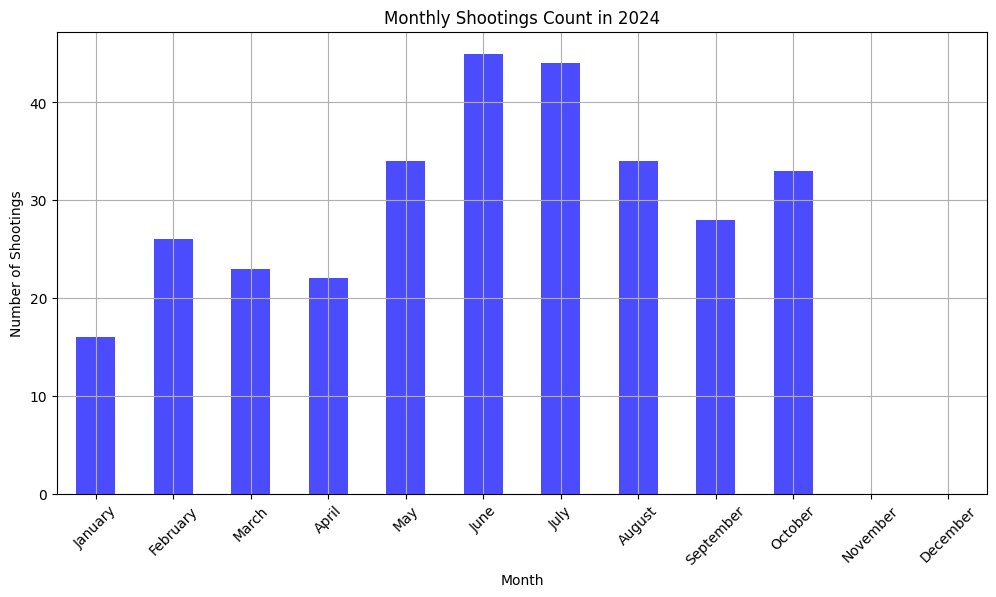

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
file_path = r'C:\Users\chari\Documents\Data Tech Analytics\CPD_Reported_Shootings_20241026.csv'  # Correct file path
shootings_data = pd.read_csv(file_path)

# Filter for the year 2024
shootings_2024 = shootings_data[shootings_data['YearOccurred'] == 2024]

# Convert DateOccurred to datetime
shootings_2024['DateOccurred'] = pd.to_datetime(shootings_2024['DateOccurred'], format='%Y%m%d')

# Create a new column for Month
shootings_2024['Month'] = shootings_2024['DateOccurred'].dt.month_name()

# Count shootings per month
monthly_counts_2024 = shootings_2024['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plotting the monthly counts
plt.figure(figsize=(12, 6))
monthly_counts_2024.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Monthly Shootings Count in 2024')
plt.xlabel('Month')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.grid()
plt.show()


## Resources and References
*What resources and references have you used for this project?*
📝 I have the 2 datasets the City of Cincinnati and 1 API from them as well. I might add more later on since I know there will be need for further research.

In [1]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 7712 bytes to source.py
